In [ ]:
# 🧮 Data & Math Libraries
import pandas as pd
import numpy as np

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 🧠 NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import spacy
import textstat
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# 🧪 Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier



# ⚙️ Advanced ML Models
import xgboost as xgb
from catboost import CatBoostClassifier
import shap
import lime
from lime.lime_text import LimeTextExplainer




In [20]:
fakes = pd.read_csv("Fake.csv")
reals = pd.read_csv("True.csv")


fakes['label']  = 0
reals['label'] = 1

df= pd.concat([fakes , reals] , ignore_index=True)


df= df.sample(frac=1).reset_index(drop=True)

df.to_csv("raw.csv", index=False)


In [3]:
df.head()

,title,text,subject,date,label
0,JUST IN: ROY MOORE Accuser ADMITS to FORGING Y...,"The credibility of Beverly Young Nelson, the w...",left-news,"Dec 8, 2017",0
1,BREAKING: HILLARY CAUGHT Using Teen Actor Whos...,Our first female candidate for President is so...,left-news,"Oct 5, 2016",0
2,Malta offers 1 million-euro reward to find jou...,VALLETTA (Reuters) - Malta s government said o...,worldnews,"October 21, 2017",1
3,ICYMI: Seth Meyers Rips Apart Email from Paul...,"Like many other comedians, Seth Meyers is not ...",News,"May 10, 2017",0
4,Greek archaeologists clear way for Hellenikon ...,ATHENS (Reuters) - Greece welcomed a decision ...,politicsNews,"October 4, 2017",1


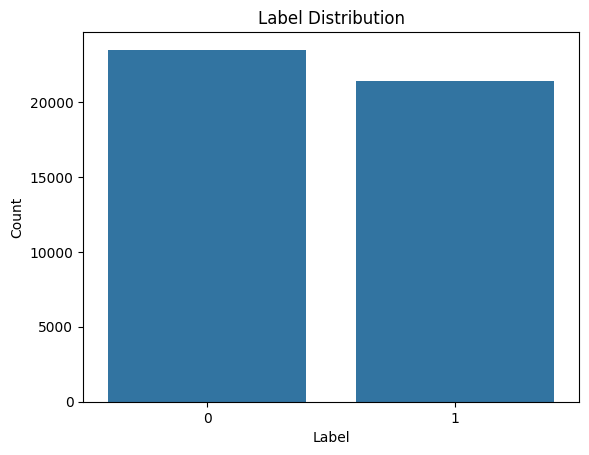

In [4]:
sns.countplot(x='label', data=df)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

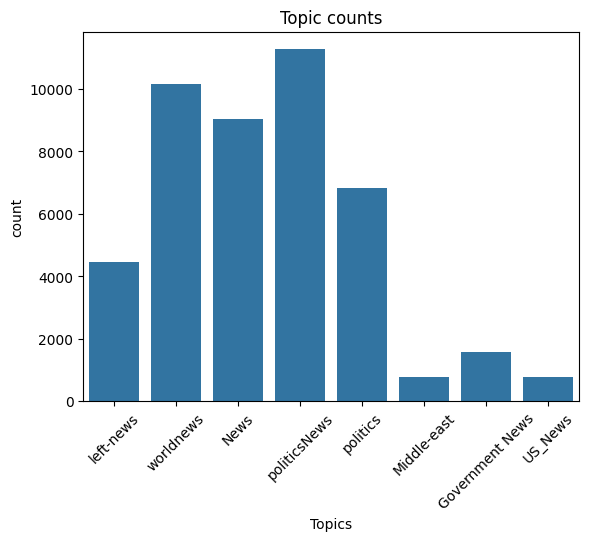

In [5]:
sns.countplot(x='subject' , data = df)
plt.title("Topic counts")
plt.xlabel("Topics")
plt.ylabel("count")
plt.xticks(rotation = 45)
plt.show()

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Uncomment these lines the first time you use NLTK
# nltk.download('stopwords')
# nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def cleaned_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)              # remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)           # keep only letters
    text = re.sub(r'\s+', ' ', text).strip()         # remove extra spaces
    words = text.split()                             # SPLIT INTO WORDS
    cleaned_words = [
        lemmatizer.lemmatize(word) for word in words if word not in stop_words
    ]
    return ' '.join(cleaned_words)                   # JOIN THE WORDS, NOT CHARACTERS

df['cleaned_text'] = df['text'].apply(cleaned_text)


In [16]:
df['flesch'] = df['cleaned_text'].apply(textstat.flesch_reading_ease)

df

,title,text,subject,date,label,cleaned_text,flesch
0,JUST IN: ROY MOORE Accuser ADMITS to FORGING Y...,"The credibility of Beverly Young Nelson, the w...",left-news,"Dec 8, 2017",0,credibility beverly young nelson woman accused...,-604.797161
1,BREAKING: HILLARY CAUGHT Using Teen Actor Whos...,Our first female candidate for President is so...,left-news,"Oct 5, 2016",0,first female candidate president crooked dirty...,-411.783000
2,Malta offers 1 million-euro reward to find jou...,VALLETTA (Reuters) - Malta s government said o...,worldnews,"October 21, 2017",1,valletta reuters malta government said saturda...,-145.223608
3,ICYMI: Seth Meyers Rips Apart Email from Paul...,"Like many other comedians, Seth Meyers is not ...",News,"May 10, 2017",0,like many comedian seth meyers impressed healt...,-59.689496
4,Greek archaeologists clear way for Hellenikon ...,ATHENS (Reuters) - Greece welcomed a decision ...,politicsNews,"October 4, 2017",1,athens reuters greece welcomed decision senior...,-248.114865
...,...,...,...,...,...,...,...
44893,AWESOME PHOTOS CAPTURE A “Badass” Trump And Hi...,While visiting the USS Gerald R. Ford today do...,politics,"Mar 2, 2017",0,visiting us gerald r ford today docked newport...,-155.422362
44894,BREAKING: YOU’RE FIRED! FBI DIRECTOR JAMES COM...,Wow! This is clearly something the White House...,politics,"May 9, 2017",0,wow clearly something white house prepared pac...,-81.728151
44895,Same-sex marriage may be law in Australia by e...,MELBOURNE (Reuters) - Australian lawmakers on ...,worldnews,"November 16, 2017",1,melbourne reuters australian lawmaker thursday...,-184.650964
44896,Belgian trial of Paris attacker Abdeslam postp...,BRUSSELS (Reuters) - The Belgian trial of one ...,worldnews,"December 15, 2017",1,brussels reuters belgian trial one suspect beh...,-11.462500


In [17]:
vectotizer = TfidfVectorizer(max_features=5000)
X = vectotizer.fit_transform(df['cleaned_text'])
y = df['label']



X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


from xgboost import XGBClassifier

# Your train-test data: X_train, X_test, y_train, y_test

# 1. Define classifiers and their parameter grids
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10, 20]
        }
    },
    
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['lbfgs']
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    }
}

# 2. Loop through each model and perform GridSearchCV
for name, mp in models.items():
    print(f"Training {name}...")
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train, y_train)
    
    print(f"Best params for {name}: {clf.best_params_}")
    
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test accuracy for {name}: {acc:.4f}\n")


Training RandomForest...
Best params for RandomForest: {'max_depth': None, 'n_estimators': 100}
Test accuracy for RandomForest: 0.9981

Training XGBoost...


c:\Users\Prasad.LAPTOP-R00KVI21\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:21:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params for XGBoost: {'max_depth': 3, 'n_estimators': 100}
Test accuracy for XGBoost: 0.9980

Training LogisticRegression...
Best params for LogisticRegression: {'C': 10, 'solver': 'lbfgs'}
Test accuracy for LogisticRegression: 0.9913

Training SVM...


KeyboardInterrupt: 